In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import xgboost
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
traindf=pd.read_excel('Data_Train.xlsx')
traindf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
testdf=pd.read_excel('Test_set.xlsx')
testdf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
traindf.shape

(10683, 11)

In [5]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
traindf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
traindf['Route']=traindf['Route'].fillna(0)
traindf['Total_Stops']=traindf['Total_Stops'].fillna(0)

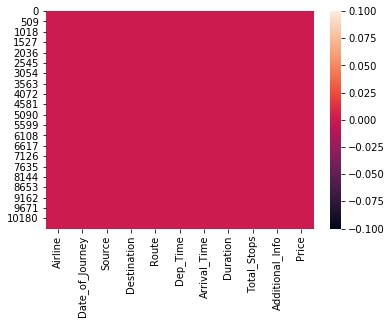

In [8]:
sns.heatmap(traindf.isnull())

In [9]:
traindf.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

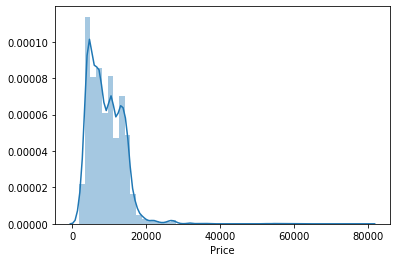

In [10]:
sns.distplot(traindf['Price'])

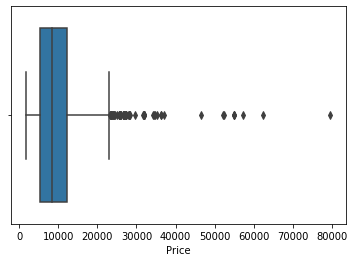

In [11]:
sns.boxplot(traindf['Price'])

In [12]:
from scipy.stats import boxcox
traindf['Price']=boxcox(traindf['Price'],0)

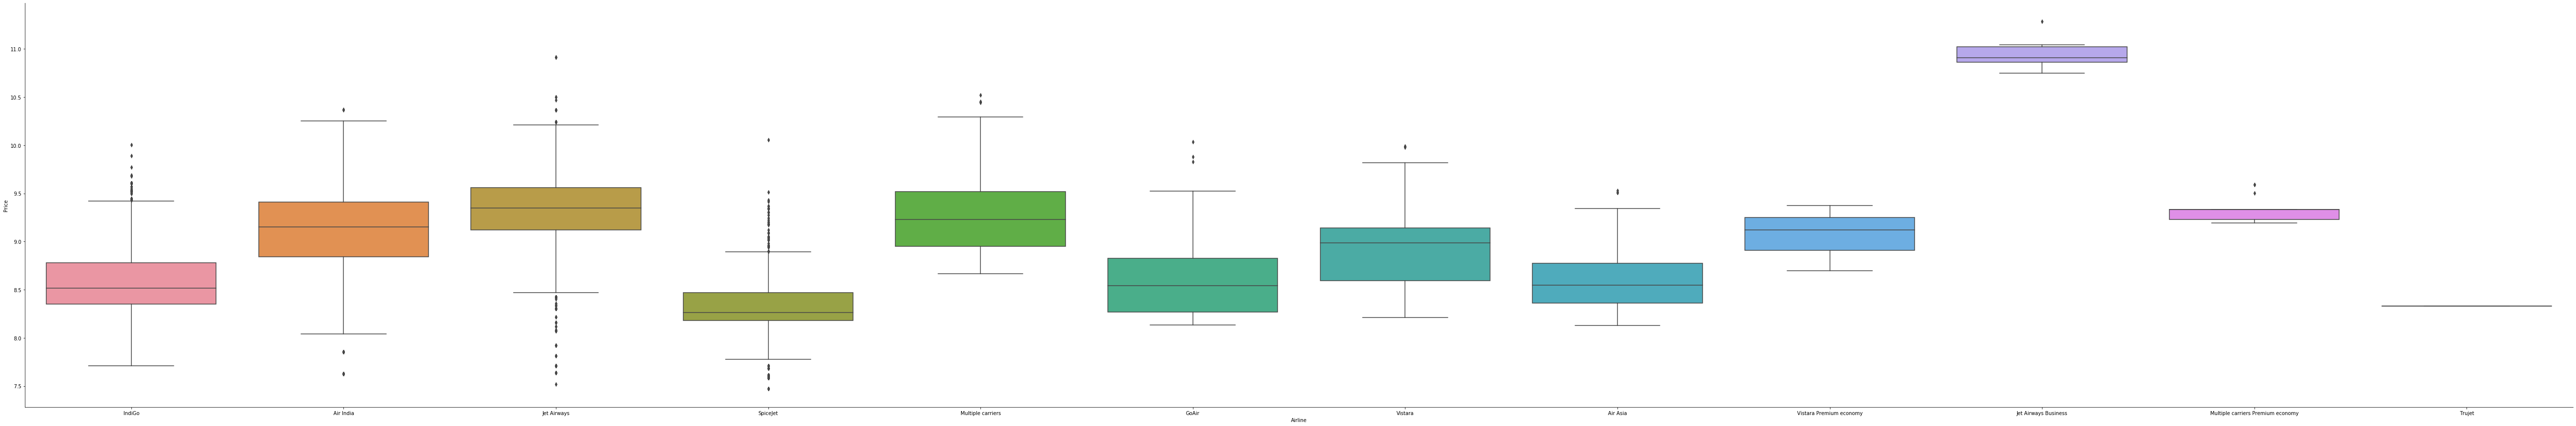

In [13]:
sns.catplot(x='Airline',y='Price',kind='box',data=traindf,height=12,aspect=6)

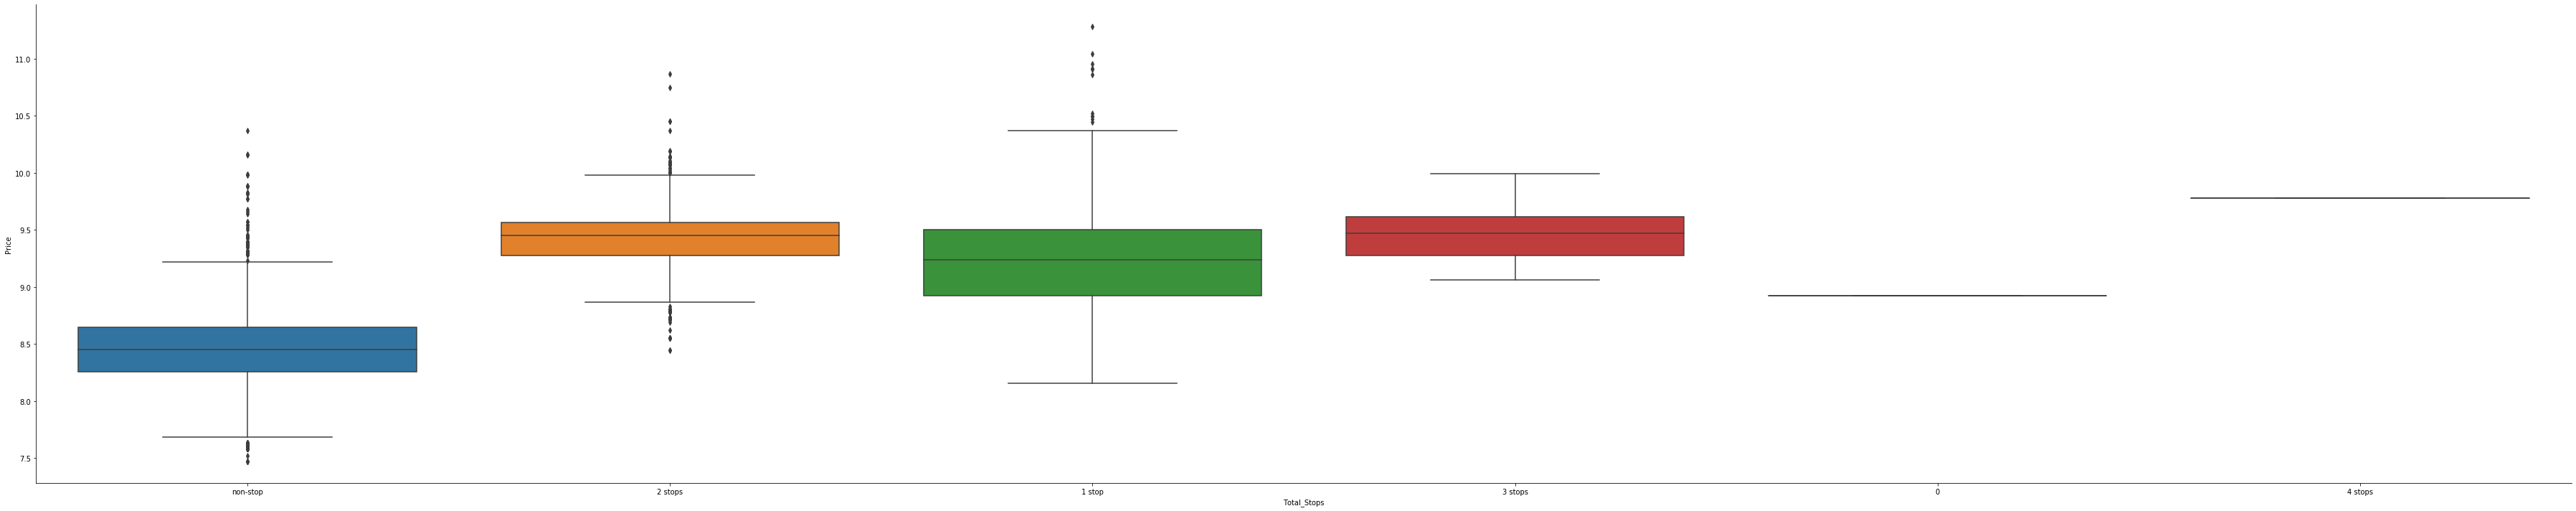

In [14]:
sns.catplot(x='Total_Stops',y='Price',kind='box',data=traindf,height=10,aspect=5)

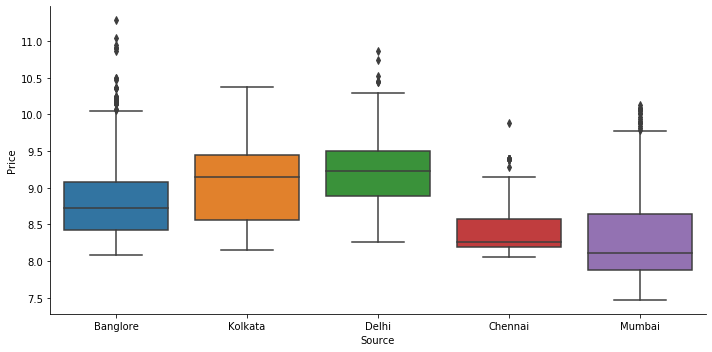

In [15]:
sns.catplot(x='Source',y='Price',kind='box',data=traindf,height=5,aspect=2)

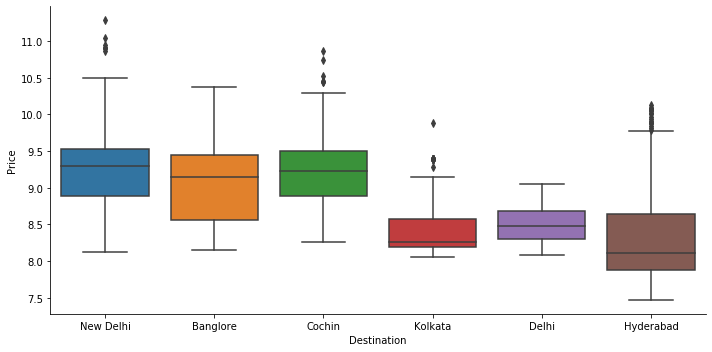

In [16]:
sns.catplot(x='Destination',y='Price',kind='box',data=traindf,height=5,aspect=2)

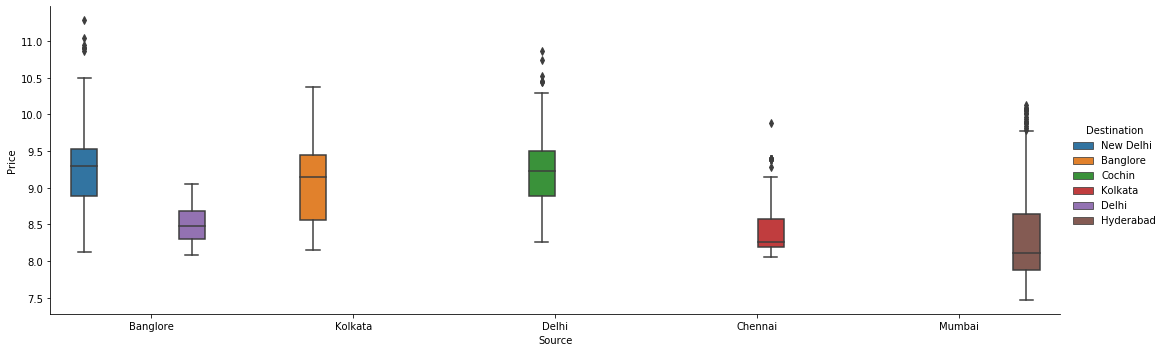

In [17]:
sns.catplot(x='Source',y='Price',hue='Destination',kind='box',data=traindf,height=5,aspect=3)

In [18]:
testdf.shape

(2671, 10)

In [19]:
traindf['Date_of_journey']=traindf['Date_of_Journey'].str.split('/').str[0]

traindf['Month_of_journey']=traindf['Date_of_Journey'].str.split('/').str[1]

traindf['Year_of_journey']=traindf['Date_of_Journey'].str.split('/').str[2]

traindf.drop(['Date_of_Journey'],axis=1,inplace=True)

In [20]:
#Arrival_Time

traindf['Arrival_Time']=traindf['Arrival_Time'].str.split(' ').str[0]

traindf['Arrival_Hour']=traindf['Arrival_Time'].str.split(':').str[0]

traindf['Arrival_Minute']=traindf['Arrival_Time'].str.split(':').str[1]

traindf.drop(['Arrival_Time'],axis=1,inplace=True)

In [21]:
# Dep_Time

traindf['Dep_Hour']=traindf['Dep_Time'].str.split(':').str[0]

traindf['Dep_Minute']=traindf['Dep_Time'].str.split(':').str[1]

traindf.drop(['Dep_Time'],axis=1,inplace=True)

In [22]:
#Duration

traindf['Duration_hour']=traindf['Duration'].str.split('h').str[0]

traindf['Duration_hour'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     265
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
5m       1
40       1
41       1
Name: Duration_hour, dtype: int64

In [23]:
traindf.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,8.267962,24,03,2019,01,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,8.944028,1,05,2019,13,15,05,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,9.538348,9,06,2019,04,25,09,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,8.735204,12,05,2019,23,30,18,05,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,9.495670,01,03,2019,21,35,16,50,4


In [24]:
traindf.shape

(10683, 16)

In [25]:
def change(data):
    if data=='5m':
        x='0'
    else:
        x=data
    return x

traindf['Duration_hour']=traindf['Duration_hour'].apply(lambda x:change(x))

In [26]:
traindf['Duration']=traindf['Duration'].str.split(' ').str[1]

traindf['Duration_minute']=traindf['Duration'].str.split('m').str[0]

traindf['Duration_minute'].fillna('0',inplace=True)

traindf.drop(['Duration'],axis=1,inplace=True)

traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Route             10683 non-null  object 
 4   Total_Stops       10683 non-null  object 
 5   Additional_Info   10683 non-null  object 
 6   Price             10683 non-null  float64
 7   Date_of_journey   10683 non-null  object 
 8   Month_of_journey  10683 non-null  object 
 9   Year_of_journey   10683 non-null  object 
 10  Arrival_Hour      10683 non-null  object 
 11  Arrival_Minute    10683 non-null  object 
 12  Dep_Hour          10683 non-null  object 
 13  Dep_Minute        10683 non-null  object 
 14  Duration_hour     10683 non-null  object 
 15  Duration_minute   10683 non-null  object 
dtypes: float64(1), object(15)
memory usage: 

In [27]:
traindf['Date_of_journey']=traindf['Date_of_journey'].astype(int)
traindf['Month_of_journey']=traindf['Month_of_journey'].astype(int)
traindf['Year_of_journey']=traindf['Year_of_journey'].astype(int)
traindf['Arrival_Hour']=traindf['Arrival_Hour'].astype(int)
traindf['Arrival_Minute']=traindf['Arrival_Minute'].astype(int)
traindf['Dep_Hour']=traindf['Dep_Hour'].astype(int)
traindf['Dep_Minute']=traindf['Dep_Minute'].astype(int)
traindf['Duration_hour']=traindf['Duration_hour'].astype(int)
traindf['Duration_minute']=traindf['Duration_minute'].astype(int)

In [28]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Route             10683 non-null  object 
 4   Total_Stops       10683 non-null  object 
 5   Additional_Info   10683 non-null  object 
 6   Price             10683 non-null  float64
 7   Date_of_journey   10683 non-null  int32  
 8   Month_of_journey  10683 non-null  int32  
 9   Year_of_journey   10683 non-null  int32  
 10  Arrival_Hour      10683 non-null  int32  
 11  Arrival_Minute    10683 non-null  int32  
 12  Dep_Hour          10683 non-null  int32  
 13  Dep_Minute        10683 non-null  int32  
 14  Duration_hour     10683 non-null  int32  
 15  Duration_minute   10683 non-null  int32  
dtypes: float64(1), int32(9), object(6)
memor

In [29]:
traindf['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → JLR → HYD                         1
BOM → GOI → HYD                         1
BLR → CCU → BBI → HYD → VGA → DEL       1
CCU → IXZ → MAA → BLR                   1
0                                       1
Name: Route, Length: 129, dtype: int64

In [30]:
traindf['Route_1']=traindf['Route'].str.split('→ ').str[0]

traindf['Route_2']=traindf['Route'].str.split('→ ').str[1]

traindf['Route_3']=traindf['Route'].str.split('→ ').str[2]

traindf['Route_4']=traindf['Route'].str.split('→ ').str[3]

traindf['Route_5']=traindf['Route'].str.split('→ ').str[4]

traindf['Route_6']=traindf['Route'].str.split('→ ').str[5]

traindf.drop(['Route'],axis=1,inplace=True)

In [31]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Total_Stops       10683 non-null  object 
 4   Additional_Info   10683 non-null  object 
 5   Price             10683 non-null  float64
 6   Date_of_journey   10683 non-null  int32  
 7   Month_of_journey  10683 non-null  int32  
 8   Year_of_journey   10683 non-null  int32  
 9   Arrival_Hour      10683 non-null  int32  
 10  Arrival_Minute    10683 non-null  int32  
 11  Dep_Hour          10683 non-null  int32  
 12  Dep_Minute        10683 non-null  int32  
 13  Duration_hour     10683 non-null  int32  
 14  Duration_minute   10683 non-null  int32  
 15  Route_1           10682 non-null  object 
 16  Route_2           10682 non-null  object

In [32]:
traindf['Route_1'].fillna('None',inplace=True)
traindf['Route_2'].fillna('None',inplace=True)
traindf['Route_3'].fillna('None',inplace=True)
traindf['Route_4'].fillna('None',inplace=True)
traindf['Route_5'].fillna('None',inplace=True)
traindf['Route_6'].fillna('None',inplace=True)

In [33]:
le=LabelEncoder()
traindf['Route_1']=le.fit_transform(traindf['Route_1'])
traindf['Route_2']=le.fit_transform(traindf['Route_2'])
traindf['Route_3']=le.fit_transform(traindf['Route_3'])
traindf['Route_4']=le.fit_transform(traindf['Route_4'])
traindf['Route_5']=le.fit_transform(traindf['Route_5'])
traindf['Route_6']=le.fit_transform(traindf['Route_6'])

In [34]:
traindf['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
0              1
Name: Total_Stops, dtype: int64

In [35]:
traindf['Total_Stops'].replace(['non-stop'],['0 stop'],inplace=True)
traindf['Total_Stops'].value_counts()

1 stop     5625
0 stop     3491
2 stops    1520
3 stops      45
4 stops       1
0             1
Name: Total_Stops, dtype: int64

In [36]:
traindf['Stops']=traindf['Total_Stops'].str.split(' ').str[0]

In [37]:
traindf['Stops'].fillna('0',inplace=True)

In [38]:
traindf['Stops']=traindf['Stops'].astype(int)

traindf.drop(['Total_Stops'],axis=1,inplace=True)

In [39]:
traindf['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [40]:
traindf['Source']=le.fit_transform(traindf['Source'])

In [41]:
traindf['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [42]:
traindf['Airline']=le.fit_transform(traindf['Airline'])

In [43]:
traindf['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [44]:
#df['Additional_Info'].replace(['No Info'],['No info'],inplace=True)

traindf['Additional_Info']=le.fit_transform(traindf['Additional_Info'])

In [45]:
traindf['Destination'].value_counts()
traindf['Destination']=le.fit_transform(traindf['Destination'])

In [46]:
traindf.head(31)

,Airline,Source,Destination,Additional_Info,Price,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,...,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,5,8,8.267962,24,3,2019,1,10,...,20,2,50,0,13,24,12,4,1,0
1,1,3,0,8,8.944028,1,5,2019,13,15,...,50,7,25,2,25,1,3,4,1,2
2,4,2,1,8,9.538348,9,6,2019,4,25,...,25,19,0,3,32,4,5,4,1,2
3,3,3,0,8,8.735204,12,5,2019,23,30,...,5,5,25,2,34,3,12,4,1,1
4,3,0,5,8,9.495670,1,3,2019,21,35,...,50,4,45,0,34,8,12,4,1,1
5,8,3,0,8,8.261785,24,6,2019,11,25,...,0,2,25,2,5,24,12,4,1,0
6,4,0,5,5,9.313529,12,3,2019,10,25,...,55,15,30,0,7,8,12,4,1,1
7,4,0,5,8,10.010996,1,3,2019,5,5,...,0,21,5,0,7,8,12,4,1,1
8,4,0,5,5,9.313529,12,3,2019,10,25,...,55,25,30,0,7,8,12,4,1,1
9,6,2,1,8,9.062420,27,5,2019,19,15,...,25,7,50,3,7,6,12,4,1,1


In [47]:
traindf.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date_of_journey     0
Month_of_journey    0
Year_of_journey     0
Arrival_Hour        0
Arrival_Minute      0
Dep_Hour            0
Dep_Minute          0
Duration_hour       0
Duration_minute     0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
Route_6             0
Stops               0
dtype: int64

In [48]:
traindf.head(31)

,Airline,Source,Destination,Additional_Info,Price,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,...,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,5,8,8.267962,24,3,2019,1,10,...,20,2,50,0,13,24,12,4,1,0
1,1,3,0,8,8.944028,1,5,2019,13,15,...,50,7,25,2,25,1,3,4,1,2
2,4,2,1,8,9.538348,9,6,2019,4,25,...,25,19,0,3,32,4,5,4,1,2
3,3,3,0,8,8.735204,12,5,2019,23,30,...,5,5,25,2,34,3,12,4,1,1
4,3,0,5,8,9.495670,1,3,2019,21,35,...,50,4,45,0,34,8,12,4,1,1
5,8,3,0,8,8.261785,24,6,2019,11,25,...,0,2,25,2,5,24,12,4,1,0
6,4,0,5,5,9.313529,12,3,2019,10,25,...,55,15,30,0,7,8,12,4,1,1
7,4,0,5,8,10.010996,1,3,2019,5,5,...,0,21,5,0,7,8,12,4,1,1
8,4,0,5,5,9.313529,12,3,2019,10,25,...,55,25,30,0,7,8,12,4,1,1
9,6,2,1,8,9.062420,27,5,2019,19,15,...,25,7,50,3,7,6,12,4,1,1


In [49]:
testdf.shape

(2671, 10)

In [50]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [51]:
testdf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [52]:
testdf.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [53]:
testdf['Date_of_journey']=testdf['Date_of_Journey'].str.split('/').str[0]

testdf['Month_of_journey']=testdf['Date_of_Journey'].str.split('/').str[1]

testdf['Year_of_journey']=testdf['Date_of_Journey'].str.split('/').str[2]

testdf.drop(['Date_of_Journey'],axis=1,inplace=True)

In [54]:
#Arrival_Time

testdf['Arrival_Time']=testdf['Arrival_Time'].str.split(' ').str[0]

testdf['Arrival_Hour']=testdf['Arrival_Time'].str.split(':').str[0]

testdf['Arrival_Minute']=testdf['Arrival_Time'].str.split(':').str[1]

testdf.drop(['Arrival_Time'],axis=1,inplace=True)


In [55]:
# Dep_Time

testdf['Dep_Hour']=testdf['Dep_Time'].str.split(':').str[0]

testdf['Dep_Minute']=testdf['Dep_Time'].str.split(':').str[1]

testdf.drop(['Dep_Time'],axis=1,inplace=True)

In [56]:
#Duration

testdf['Duration_hour']=testdf['Duration'].str.split('h').str[0]

testdf['Duration_hour'].value_counts()

2     565
1     164
5     127
3     126
7     113
12    110
13    109
8     107
9     106
10    104
11    102
6     102
14     87
15     71
23     66
4      56
22     55
16     52
26     51
25     45
24     43
27     43
20     41
21     41
18     38
19     34
17     32
28     22
30     12
29     11
33      8
38      7
37      5
36      4
35      3
32      3
31      2
5m      1
39      1
34      1
40      1
Name: Duration_hour, dtype: int64

In [57]:
def change(data):
    if data=='5m':
        x='0'
    else:
        x=data
    return x

testdf['Duration_hour']=testdf['Duration_hour'].apply(lambda x:change(x))

In [58]:
testdf['Duration']=testdf['Duration'].str.split(' ').str[1]

testdf['Duration_minute']=testdf['Duration'].str.split('m').str[0]

testdf['Duration_minute'].fillna('0',inplace=True)

testdf.drop(['Duration'],axis=1,inplace=True)

testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           2671 non-null   object
 1   Source            2671 non-null   object
 2   Destination       2671 non-null   object
 3   Route             2671 non-null   object
 4   Total_Stops       2671 non-null   object
 5   Additional_Info   2671 non-null   object
 6   Date_of_journey   2671 non-null   object
 7   Month_of_journey  2671 non-null   object
 8   Year_of_journey   2671 non-null   object
 9   Arrival_Hour      2671 non-null   object
 10  Arrival_Minute    2671 non-null   object
 11  Dep_Hour          2671 non-null   object
 12  Dep_Minute        2671 non-null   object
 13  Duration_hour     2671 non-null   object
 14  Duration_minute   2671 non-null   object
dtypes: object(15)
memory usage: 313.1+ KB


In [59]:
testdf.shape

(2671, 15)

In [60]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           2671 non-null   object
 1   Source            2671 non-null   object
 2   Destination       2671 non-null   object
 3   Route             2671 non-null   object
 4   Total_Stops       2671 non-null   object
 5   Additional_Info   2671 non-null   object
 6   Date_of_journey   2671 non-null   object
 7   Month_of_journey  2671 non-null   object
 8   Year_of_journey   2671 non-null   object
 9   Arrival_Hour      2671 non-null   object
 10  Arrival_Minute    2671 non-null   object
 11  Dep_Hour          2671 non-null   object
 12  Dep_Minute        2671 non-null   object
 13  Duration_hour     2671 non-null   object
 14  Duration_minute   2671 non-null   object
dtypes: object(15)
memory usage: 313.1+ KB


In [61]:
testdf['Date_of_journey']=testdf['Date_of_journey'].astype(int)
testdf['Month_of_journey']=testdf['Month_of_journey'].astype(int)
testdf['Year_of_journey']=testdf['Year_of_journey'].astype(int)
testdf['Arrival_Hour']=testdf['Arrival_Hour'].astype(int)
testdf['Arrival_Minute']=testdf['Arrival_Minute'].astype(int)
testdf['Dep_Hour']=testdf['Dep_Hour'].astype(int)
testdf['Dep_Minute']=testdf['Dep_Minute'].astype(int)
testdf['Duration_hour']=testdf['Duration_hour'].astype(int)

In [62]:
testdf['Route'].value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → JDH → DEL            1
BLR → BDQ → DEL                  1
CCU → BOM → TRV → BLR            1
BLR → BOM → IDR → GWL → DEL      1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64

In [63]:
testdf['Route_1']=testdf['Route'].str.split('→ ').str[0]

testdf['Route_2']=testdf['Route'].str.split('→ ').str[1]

testdf['Route_3']=testdf['Route'].str.split('→ ').str[2]

testdf['Route_4']=testdf['Route'].str.split('→ ').str[3]

testdf['Route_5']=testdf['Route'].str.split('→ ').str[4]

testdf['Route_6']=testdf['Route'].str.split('→ ').str[5]

testdf.drop(['Route'],axis=1,inplace=True)

In [64]:
testdf['Route_1'].fillna('None',inplace=True)
testdf['Route_2'].fillna('None',inplace=True)
testdf['Route_3'].fillna('None',inplace=True)
testdf['Route_4'].fillna('None',inplace=True)
testdf['Route_5'].fillna('None',inplace=True)
testdf['Route_6'].fillna('None',inplace=True)

In [65]:
le=LabelEncoder()
testdf['Route_1']=le.fit_transform(testdf['Route_1'])
testdf['Route_2']=le.fit_transform(testdf['Route_2'])
testdf['Route_3']=le.fit_transform(testdf['Route_3'])
testdf['Route_4']=le.fit_transform(testdf['Route_4'])
testdf['Route_5']=le.fit_transform(testdf['Route_5'])
testdf['Route_6']=le.fit_transform(testdf['Route_6'])

In [66]:
testdf['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [67]:
testdf['Total_Stops'].replace(['non-stop'],['0 stop'],inplace=True)
testdf['Total_Stops'].value_counts()

1 stop     1431
0 stop      849
2 stops     379
3 stops      11
4 stops       1
Name: Total_Stops, dtype: int64

In [68]:
testdf['Stops']=testdf['Total_Stops'].str.split(' ').str[0]

In [69]:
testdf['Stops'].fillna('0',inplace=True)
testdf['Stops']=testdf['Stops'].astype(int)

testdf.drop(['Total_Stops'],axis=1,inplace=True)

In [70]:
testdf['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [71]:
testdf['Source']=le.fit_transform(testdf['Source'])

In [72]:
testdf['Airline']=le.fit_transform(testdf['Airline'])

In [73]:
testdf['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Change airports                    1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [74]:
testdf['Additional_Info']=le.fit_transform(testdf['Additional_Info'])

In [75]:
testdf['Destination'].value_counts()
testdf['Destination']=le.fit_transform(testdf['Destination'])

In [76]:
testdf.head(31)

,Airline,Source,Destination,Additional_Info,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,4,2,1,5,6,6,2019,4,25,17,30,10,55,3,7,5,8,3,1,1
1,3,3,0,5,12,5,2019,10,20,6,20,4,0,2,29,3,8,3,1,1
2,4,2,1,3,21,5,2019,19,0,19,15,23,45,3,7,5,8,3,1,1
3,6,2,1,5,21,5,2019,21,0,8,0,13,0,3,7,5,8,3,1,1
4,0,0,2,5,24,6,2019,2,45,23,55,2,50,0,13,21,8,3,1,0
5,4,2,1,3,12,6,2019,12,35,18,15,18,20,3,7,5,8,3,1,1
6,1,0,5,5,12,3,2019,22,35,7,30,15,5,0,35,7,8,3,1,1
7,3,3,0,5,1,5,2019,20,30,15,15,5,15,2,19,3,8,3,1,1
8,3,3,0,5,15,3,2019,12,55,10,10,2,45,2,5,21,8,3,1,0
9,4,3,0,5,18,5,2019,22,35,16,30,6,5,2,7,3,8,3,1,1


In [77]:
df=pd.concat([traindf,testdf])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  int32  
 1   Source            13354 non-null  int32  
 2   Destination       13354 non-null  int32  
 3   Additional_Info   13354 non-null  int32  
 4   Price             10683 non-null  float64
 5   Date_of_journey   13354 non-null  int32  
 6   Month_of_journey  13354 non-null  int32  
 7   Year_of_journey   13354 non-null  int32  
 8   Arrival_Hour      13354 non-null  int32  
 9   Arrival_Minute    13354 non-null  int32  
 10  Dep_Hour          13354 non-null  int32  
 11  Dep_Minute        13354 non-null  int32  
 12  Duration_hour     13354 non-null  int32  
 13  Duration_minute   13354 non-null  object 
 14  Route_1           13354 non-null  int32  
 15  Route_2           13354 non-null  int32  
 16  Route_3           13354 non-null  int32  

In [79]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Price',
       'Date_of_journey', 'Month_of_journey', 'Year_of_journey',
       'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute',
       'Duration_hour', 'Duration_minute', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'Route_6', 'Stops'],
      dtype='object')

In [80]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price               2671
Date_of_journey        0
Month_of_journey       0
Year_of_journey        0
Arrival_Hour           0
Arrival_Minute         0
Dep_Hour               0
Dep_Minute             0
Duration_hour          0
Duration_minute        0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
Route_6                0
Stops                  0
dtype: int64

In [81]:
df['Price'].fillna('0',inplace=True)

In [82]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,...,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,5,8,8.26796,24,3,2019,1,10,...,20,2,50,0,13,24,12,4,1,0
1,1,3,0,8,8.94403,1,5,2019,13,15,...,50,7,25,2,25,1,3,4,1,2
2,4,2,1,8,9.53835,9,6,2019,4,25,...,25,19,0,3,32,4,5,4,1,2
3,3,3,0,8,8.7352,12,5,2019,23,30,...,5,5,25,2,34,3,12,4,1,1
4,3,0,5,8,9.49567,1,3,2019,21,35,...,50,4,45,0,34,8,12,4,1,1


In [83]:
x=df.drop(['Price'],axis=True)
x.head()

,Airline,Source,Destination,Additional_Info,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,5,8,24,3,2019,1,10,22,20,2,50,0,13,24,12,4,1,0
1,1,3,0,8,1,5,2019,13,15,5,50,7,25,2,25,1,3,4,1,2
2,4,2,1,8,9,6,2019,4,25,9,25,19,0,3,32,4,5,4,1,2
3,3,3,0,8,12,5,2019,23,30,18,5,5,25,2,34,3,12,4,1,1
4,3,0,5,8,1,3,2019,21,35,16,50,4,45,0,34,8,12,4,1,1


In [84]:
y=df['Price']
y.head()

0    8.26796
1    8.94403
2    9.53835
3     8.7352
4    9.49567
Name: Price, dtype: object

In [85]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [87]:
print(x_train.shape,x_test.shape)

(9347, 20) (4007, 20)


In [88]:
print(y_train.shape,y_test.shape)

(9347,) (4007,)


In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [90]:
LR=LinearRegression()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)
XGR=XGBRegressor(random_state=97)

In [95]:
models=[]
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
#models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [96]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.9367941548749008
Mean_Squared_Error = 0.8393222099012836
Cross_Val_Score =  -1.667667735028072


********************************* DecisionTreeRegressor *********************************

 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=97, splitter='best')
R2_score =  0.9965177797513377
Mean_Squared_Error = 0.04624105236921608
Cross_Val_Score =  0.7997222048321244


********************************* AdaBoostRegressor *********************************

 AdaBoostRegressor(base_estimato

In [97]:
from sklearn.externals import joblib
joblib.dump(RFR,'Model_Flight_ticket.pkl')

['Model_Flight_ticket.pkl']